# Project: Bharat intern June-2023
# Mohammad Aamir Rangrez
# Stock Analysis of Tata Motors

# **Table of Contents:**
* Introduction
* Import Libraries
* Getting the Data
* Data Exploration/Analysis
* Data Preprocessing
    - Missing Data
    - Converting Features
    - Creating Categories
    - Creating new Features
* Future Engineering 
* Random Forest 
    - What is Random Forest ?
    - Feature importance
    - Hyperparameter Tuning   
* Modern Training 
    - Confusion Matrix
    - Precision and Recall 
    - F-Score
* Submission
* Summary

# Introduction
## Q. What Is the Stock Market?
#### The term stock market refers to several exchanges in which shares of publicly held companies are bought and sold. Such financial activities are conducted through formal exchanges and via over-the-counter (OTC) marketplaces that operate under a defined set of regulations. 
#### Both “stock market” and “stock exchange” are often used interchangeably. Traders in the stock market buy or sell shares on one or more of the stock exchanges that are part of the overall stock market.

In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip3 install yfinance --user

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
# import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import subprocess
subprocess.check_call(["attrib", "-H"])

0

In [3]:
start_date = '1999-01-01'
end_date = '2023-01-30'
ticker = 'TATAMOTORS.NS'

df = yf.download(ticker, start = start_date , end = end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-01,31.599886,32.155613,31.053738,31.839424,24.843613,18835718
1999-01-04,32.021473,32.663437,31.561560,31.676538,24.716520,18245781
1999-01-05,31.714865,34.215645,31.283695,34.215645,26.697731,38938718
1999-01-06,34.637230,35.317520,33.870708,35.221703,27.482735,40059886
1999-01-07,35.269611,36.850563,35.164215,36.697258,28.634081,35983032


# DATA Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6028 entries, 1999-01-01 to 2023-01-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6028 non-null   float64
 1   High       6028 non-null   float64
 2   Low        6028 non-null   float64
 3   Close      6028 non-null   float64
 4   Adj Close  6028 non-null   float64
 5   Volume     6028 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 329.7 KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6.028000e+03
mean,202.956120,206.069199,199.450769,202.632334,196.940315,1.653949e+07
std,157.467669,159.297928,155.331815,157.210658,160.128505,2.155284e+07
min,11.114574,11.631977,11.028340,11.267879,9.099405,0.000000e+00
25%,74.046066,75.834558,72.479485,74.074806,63.429532,5.864080e+06
50%,157.711983,160.313713,154.344498,157.524246,145.568825,1.004400e+07
75%,325.000000,329.437515,316.587494,322.912498,321.675591,1.855525e+07
max,600.212097,605.901123,589.873047,598.134399,597.892273,3.905778e+08


# EDA(Exploratory Data Analysis)

In [6]:
#average, median , STd, max,and min of closing prince
print("mean of closing price :", df['Close'].mean())
print("Median of closing price : ",df['Close'].median())
print("Standard deviation of closing price :",df['Close'].std())
print("Maximum value of closing price: ",df['Close'].max())
print("Minimum value of closing price :", df['Close'].min())

mean of closing price : 202.63233395515093
Median of closing price :  157.5242462158203
Standard deviation of closing price : 157.21065758308
Maximum value of closing price:  598.1343994140625
Minimum value of closing price : 11.267878532409668


The high standard deviation and the large difference between the min and max value indicate high volatility in stock prices

In [7]:
#percent return of closing price

returns = df['Close'].pct_change()
returns.head()

Date
1999-01-01         NaN
1999-01-04   -0.005116
1999-01-05    0.080157
1999-01-06    0.029403
1999-01-07    0.041893
Name: Close, dtype: float64

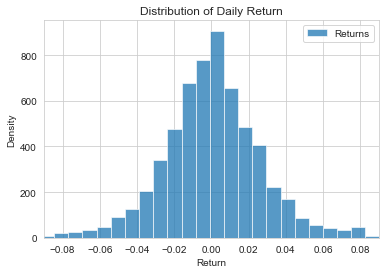

In [8]:
sns.histplot(returns[1:], bins = 50, label= 'Returns')
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Distribution of Daily Return')
plt.legend()
plt.gca().set_xlim(-0.09, 0.09)
plt.show()

Most of the distribution of daily returns of TATA Motors stock is between -0.02 and 0.02 indicates that the stock daily returns are relatively stable do not experiance large fluctuation  A high concentration of return in a narrow range suggested that the stocks price change relatively little from day to day


In [9]:
#date with Lowest and Highest returns
print(returns.idxmin())
print(returns.idxmax())

2019-02-08 00:00:00
2021-10-13 00:00:00


Lowest Return by TATA Motors
    .Tata Motors share price crashed 22.41% to a 52-week low of 141.90, due to a RS.27,838 crore non-cash charge to cover impairment at JLR, and a cut in furture profit margin outlook.

Highest Return By Tata Motors
    . Tata motors stock rose 50.82% in five days to close at Rs. 506.75on 13 Oct 20221 due to a billion Dollar invesmentfrom TPG Rise Climate to raise the valuation of the company's passenger electric vehcile business to up to 9.1 billion.


In [10]:
#chart variation between the highest return and lowest returns
Chart = df[["Open","High","Low","Close"]].loc['2019-01-01':'2022-01-01']
Chart.iplot(kind='candle')

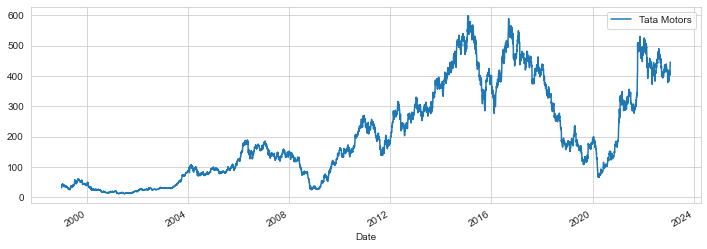

In [11]:
Closed_price = df['Close']
Closed_price.plot(label= "Tata Motors",figsize =(12,4))
plt.legend()

This is interactive version of Above plot using plotly iplot() method

In [12]:
Closed_price.iplot()

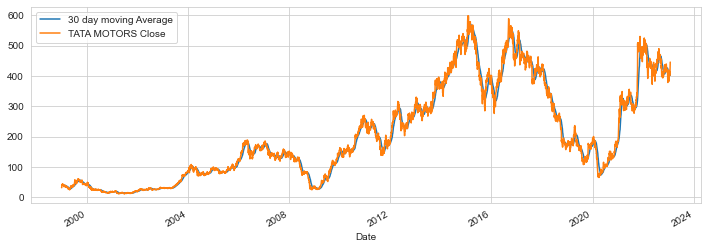

In [13]:
plt.figure(figsize=(12,4))
df['Close'].rolling(window=30).mean().plot(label = '30 day moving Average')
df['Close'].plot(label = 'TATA MOTORS Close')
plt.legend()

In [14]:
moving_avg = df['Close'].rolling(window=30).mean()
new_df = pd.merge(moving_avg, Closed_price, on='Date')
new_df.rename(columns = {'Close_x':'Moving 30 Day Avg'},inplace=True)
new_df.rename(columns= {'Close_y': 'Closing Price'},inplace = True)
new_df.iplot()

<AxesSubplot:>

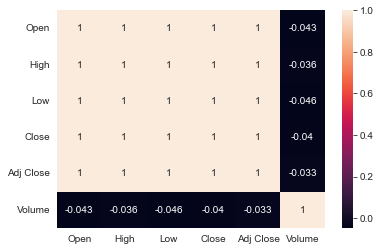

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df['Close'].loc['2022-01-01':'2023-01-30'].ta_plot(study='sma',periods = [7,21,55])

In [17]:
df['Close'].loc['2022-01-30':'2023-01-30'].ta_plot(study = 'boll')

# Future Engineering

In [18]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [19]:
#change in price in terms of close and open

df['change_percent'] =(df['Close'] - df['Open']) / df['Open'] * 100.0

In [20]:
df['high_low_percent'] = (df['High'] - df['Low']) / df['Close']* 100.0

In [21]:
#keep the neccesary column

df = df[['Close','high_low_percent','change_percent']]

In [22]:
#weekly moving Average
df['ma_7'] = df['Close'].rolling(window =7).mean()

In [23]:
# Bollinger Bands for a Close price

df['ma_20'] = df['Close'].rolling(window=20).mean()

df['std_20'] = df['Close'].rolling(window=20).std()

df['upper_band'] = df['ma_20'] + 2 * df['std_20']

df['lower_band'] = df['ma_20'] - 2 * df['std_20']

df = df.drop(['ma_20'],axis=1)

In [24]:
df['momentum'] = df['Close'].diff(periods= 1)

In [25]:
df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))

In [26]:
df.dropna(inplace= True)

In [27]:
df.head()

,Close,high_low_percent,change_percent,ma_7,std_20,upper_band,lower_band,momentum,log_returns
Date,,,,,,,,,
1999-01-28,40.434055,3.744076,-2.450305,41.420953,3.558537,46.533092,32.298945,-0.881500,-0.021567
1999-01-29,40.606522,3.586592,0.712926,41.425059,3.084511,46.023395,33.685352,0.172466,0.004256
1999-02-01,37.942860,6.363630,-5.736725,40.584623,2.466443,45.100576,35.234803,-2.663662,-0.067847
1999-02-02,37.799133,3.903675,-0.529505,39.907071,2.116659,44.580181,36.113546,-0.143726,-0.003795
1999-02-03,37.799133,5.754118,-1.375003,39.503278,1.849838,44.175412,36.776058,0.000000,0.000000


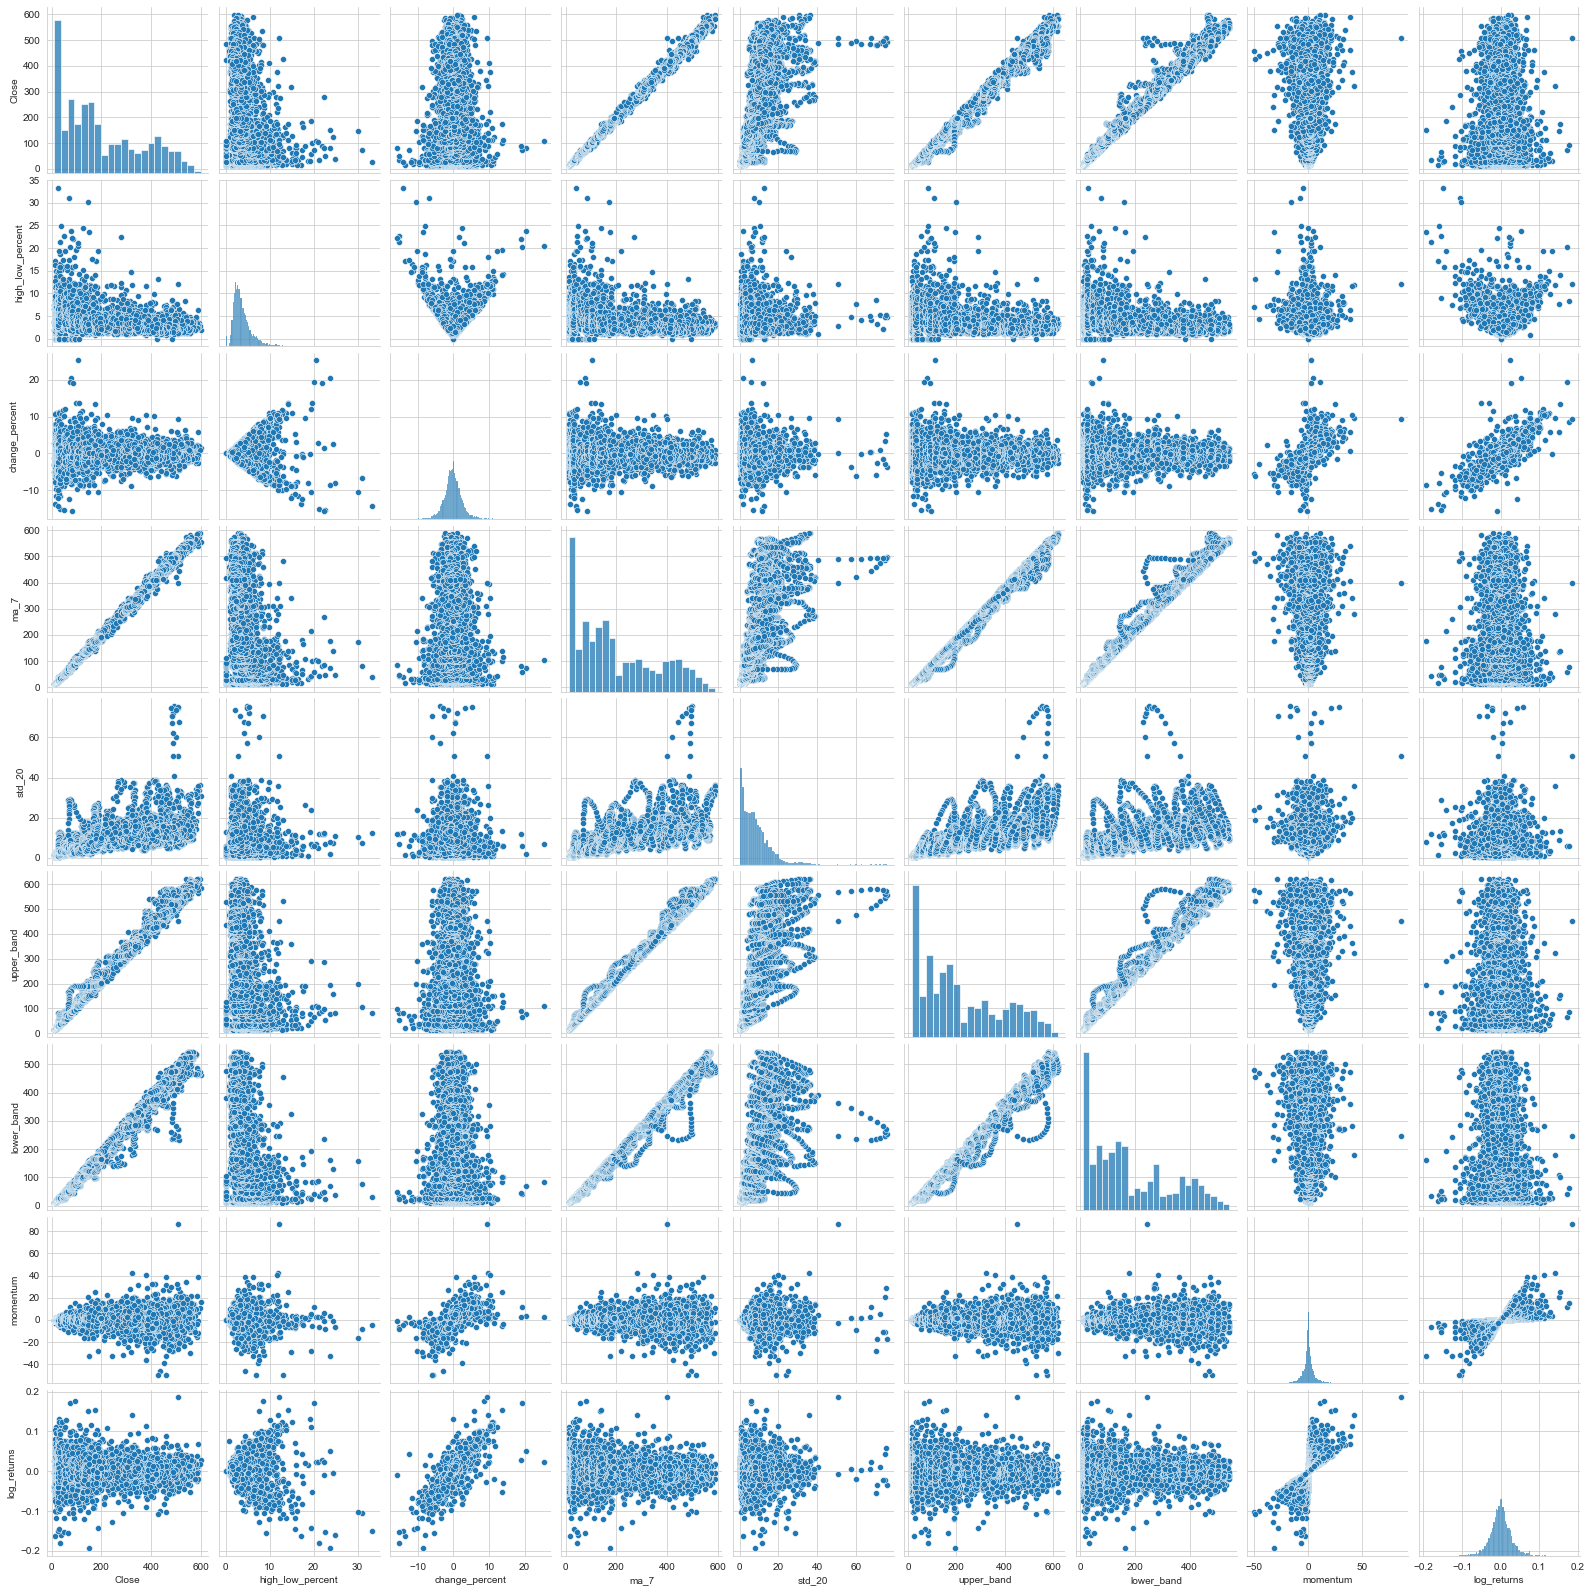

In [28]:
sns.pairplot(df)

<AxesSubplot:>

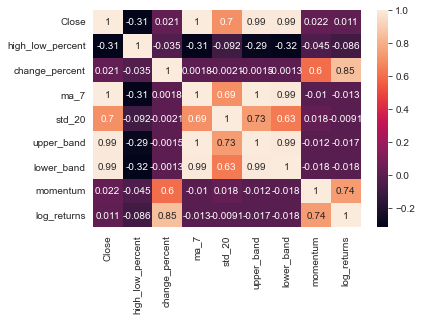

In [29]:
sns.heatmap(df.corr(),annot=True)

The close price of the stock shows a strong correlation with its 7-day moving average as well as with the upper and lower bands of bolling bands. The change in percentage between the open and close prices is highly associated with the stock momentum and log returns

In [30]:
df.columns

Index(['Close', 'high_low_percent', 'change_percent', 'ma_7', 'std_20',
       'upper_band', 'lower_band', 'momentum', 'log_returns'],
      dtype='object')

# Model Training

In [31]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled  = pd.DataFrame(df_scaled, columns= df.columns)
df = df_scaled

In [32]:
x = df.drop(['Close'], axis=1)
y = df['Close']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [33]:
model_lr = LinearRegression(n_jobs =- 1)
model_lr.fit(x_train,y_train)

model_rf = RandomForestRegressor(n_jobs=-1)
model_rf.fit(x_train,y_train)

model_svr = SVR()
model_svr.fit(x_train,y_train)

SVR()

In [34]:
SVR()

SVR()

In [35]:
y_predict_lr = model_lr.predict(x_test)
y_predict_rf = model_rf.predict(x_test)
y_predict_svr = model_svr.predict(x_test)

In [36]:
print("R2 score for linear Regression: ", r2_score(y_test, y_predict_lr))
print("R2 score for random forest: ", r2_score(y_test, y_predict_rf))
print("R2 score for SVR: ", r2_score(y_test, y_predict_svr))

R2 score for linear Regression:  0.9986755111484286
R2 score for random forest:  0.9982408334032825
R2 score for SVR:  0.9952447665510197


# Based of model Accuracy of 0.9986755111484286, it can be concluded that the linear Regression model is the best suitable model for this data.

In [37]:
model = LinearRegression().fit(x_train, y_train)
y_test_predict = model.predict(x_test)
score = r2_score(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_absolute_error(y_test, y_test_predict))
print("R2_Score:",score)
print("MSE:",mse)
print("MAE:",mae)
print("rmse;",rmse)

R2_Score: 0.9986755111484286
MSE: 0.0012689776459885367
MAE: 0.023455414085410815
rmse; 0.15315160490641558


In [38]:
pd.options.display.float_format = '{:.13f}'.format
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check['difference'] = y_test - y_test_predict
test_check.sort_index()

,actual,prediction,difference
1,-1.0341334078394,-1.0236579774280,-0.0104754304115
4,-1.0519947173852,-1.0422279493872,-0.0097667679980
12,-1.0491905301332,-1.0666664186446,0.0174758885114
14,-1.0425458967852,-1.0492843644174,0.0067384676322
15,-1.0443746945091,-1.0436694962523,-0.0007051982568
...,...,...,...
5975,1.3424439875658,1.3882831334812,-0.0458391459154
5984,1.1146754731732,1.1869755377236,-0.0723000645503
5988,1.1627103918786,1.1333361865813,0.0293742052973
5994,1.1378976511291,1.1354362040556,0.0024614470734


<AxesSubplot:xlabel='Close'>

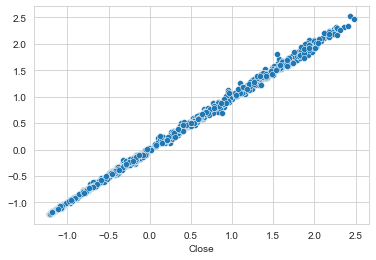

In [39]:
sns.scatterplot(y_test,y_test_predict)

# Thank You..... :)